In [2]:
import os
from glob import glob
import warnings
import json
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#reference data from manual hailstone measurements

axis_ratio = {
1: 1.00,
2: 0.59,
3: 0.43,
4: 0.65,
5: 0.26,
6: 0.82,
7: 0.93,
8: 0.57,
9: 0.36,
10: 0.53,
11: 0.47,
12: 0.79,
13: 0.80,
14: 0.48,
15: 0.79,
16: 0.58,
17: 0.54,
18: 0.77,
19: 0.30,
20: 0.42,
21: 0.75,
22: 0.74,
23: 0.68,
24: 0.69,
25: 0.51,
26: 0.64,
27: 0.92,
28: 0.89,
29: 0.31,
30: 0.86,
31: 0.82,
32: 0.86,
33: 0.52,
34: 0.74,
35: 0.94,
36: 0.95,
37: 0.84,
38: 0.88,
39: 0.89,
40: 0.56,
41: 0.55,
42: 0.78,
43: 0.96}

Dmax = {
1: 48,
2: 54,
3: 60,
4: 57,
5: 53.4,
6: 48.6,
7: 46,
8: 45,
9: 51,
10: 53.5,
11: 48,
12: 41.5,
13: 43.8,
14: 51.3,
15: 45,
16: 51.5,
17: 48.3,
18: 23.5,
19: 44.7,
20: 38.5,
21: 40,
22: 42,
23: 28.5,
24: 21.1,
25: 35.1,
26: 27.5,
27: 26.4,
28: 31.6,
29: 30,
30: 44.26,
31: 30.7,
32: 29.65,
33: 47.25,
34: 35,
35: 26.8,
36: 24,
37: 40.3,
38: 36.6,
39: 45.13,
40: 33.4,
41: 25.66,
42: 23.8,
43: 23.5}



In [4]:
stats_root = '/home/meso/data/cross-section-paper-data/analysis/paper/pipeline_stats'
rm_idx = [24,26,29]

In [5]:
#list stats files
npz_ffn_list = sorted(glob(stats_root + '/*.npz'))

#plot some stats
hail_id_list = []
Dmax_list = []
mean_edge_radius_list = []
total_dry_sa = []
n_layers = []
largest_sa = []
last_sa = []
total_dry_sa = []
n_layers = []
axis_ratio_array = []

final_wetgrowth = []

#unpack
for npz_ffn in npz_ffn_list:
    npz_fn = os.path.basename(npz_ffn)
    hail_id = int(npz_fn[6:8])
#     if hail_id in rm_idx:
#         continue
    
    data = np.load(npz_ffn)
    hail_id_list.append(hail_id)
    output_sa_array = data['output_sa_array']
    inner_array = data['output_inner_array']
    outer_array = data['output_output_array']
    mean_edge_radius_list.append(data['mean_edge_radius'])
    
    total_dry_sa.append(np.sum(output_sa_array))
    n_layers.append(len(output_sa_array))
    largest_sa.append(np.max(output_sa_array))
    last_sa.append(output_sa_array[0])
    
    axis_ratio_array.append(axis_ratio[int(hail_id)])
    Dmax_list.append(Dmax[hail_id])

    tmp = (math.pi*(data['mean_edge_radius']**2)) - (math.pi*(outer_array[0]**2))
    if tmp/(math.pi*(outer_array[0]**2)) <= 0.1:
        try:
            tmp = (math.pi*(inner_array[0]**2)) - (math.pi*(outer_array[1]**2))
        except:
            #case for only one layer as the outer layer
            tmp = (math.pi*(data['mean_edge_radius']**2)) - output_sa_array[0]
            
    if tmp/(math.pi*(outer_array[0]**2)) < 0.2:
        print(hail_id, tmp/(math.pi*(outer_array[0]**2)))
    final_wetgrowth.append(tmp)
    
#convert lists to numpy arrays
mean_edge_radius_array = np.array(mean_edge_radius_list)
Dmax_array = np.array(Dmax_list)
total_dry_array = np.array(total_dry_sa)
n_layers_array = np.array(n_layers)
axis_ratio_array = np.array(axis_ratio_array)
last_sa_array = np.array(last_sa)
largest_sa_array = np.array(largest_sa)
final_wetgrowth_array = np.array(final_wetgrowth)

total_area = math.pi*(mean_edge_radius_array**2)

perc_dry_growth = total_dry_array/total_area
perc_largest_sa = largest_sa_array/total_area
perc_final_drygrowth = last_sa_array/total_area

perc_final_wetgrowth = final_wetgrowth_array/total_area

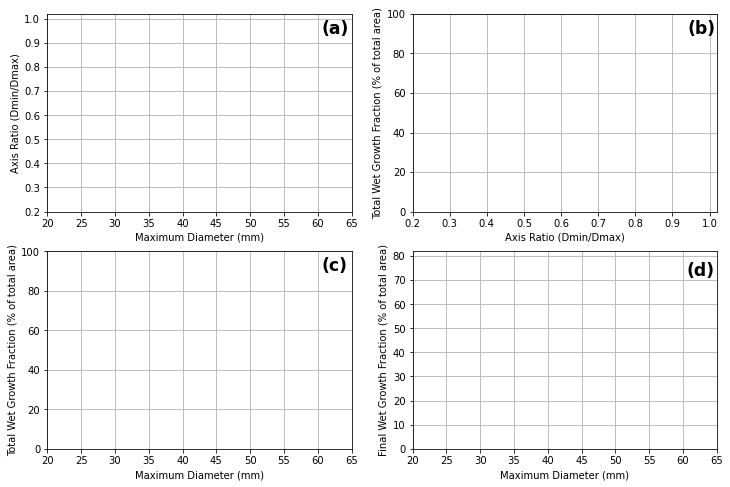

In [6]:
#make some plots

fig = plt.figure(figsize=[12,8], facecolor='w')

plt.subplot(221)
plt.plot(Dmax_list, axis_ratio_array, 'ro')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Axis Ratio (Dmin/Dmax)')
plt.xlim([20, 65])
plt.ylim([0.2, 1.02])
plt.text(60.5, 0.94, '(a)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(222)
plt.plot(axis_ratio_array, 100-perc_dry_growth*100, 'bo')
plt.xlabel('Axis Ratio (Dmin/Dmax)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([0.2, 1.02])
plt.ylim([0, 100])
plt.text(0.94, 90, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(223)
plt.plot(Dmax_list, 100-(perc_dry_growth*100), 'yd')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([20, 65])
plt.ylim([0, 100])
plt.grid()
plt.text(60.5, 90, '(c)', size='xx-large', weight='bold')

plt.subplot(224)
plt.plot(Dmax_list, perc_final_wetgrowth*100, 'kd')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Final Wet Growth Fraction (% of total area)')
plt.xlim([20,65])
plt.ylim([0, 82])
plt.text(60.5, 72, '(d)', size='xx-large', weight='bold')
plt.grid()

plt.savefig('fig05.png', dpi=150)

In [7]:
print(np.mean(100-(perc_dry_growth*100)))

nan


/home/meso/miniconda3/envs/hail-xsec/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/meso/miniconda3/envs/hail-xsec/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
dmax_array = np.array(Dmax_list)

print(np.mean(axis_ratio_array[np.logical_and(dmax_array>40, dmax_array<=60)]))

0.6408695652173914


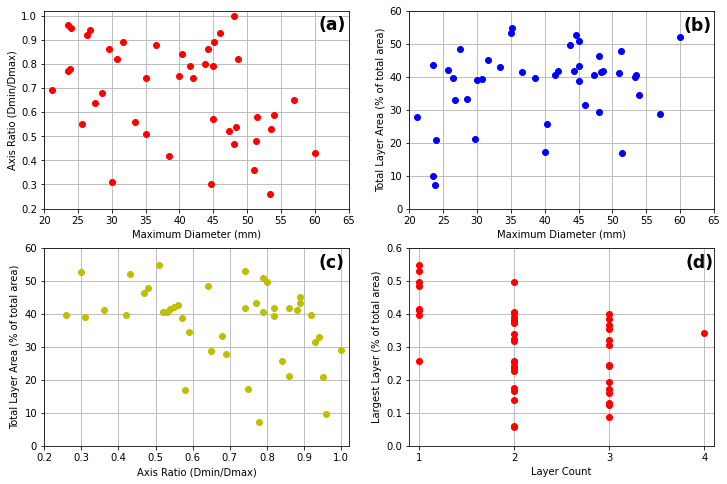

In [146]:
#make some plots

fig = plt.figure(figsize=[12,8], facecolor='w')

plt.subplot(221)
plt.plot(Dmax_list, axis_ratio_array, 'ro')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Axis Ratio (Dmin/Dmax)')
plt.xlim([20, 65])
plt.ylim([0.2, 1.02])
plt.text(60.5, 0.94, '(a)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(222)
plt.plot(Dmax_list, perc_dry_growth*100, 'bo')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Total Layer Area (% of total area)')
plt.xlim([20,65])
plt.ylim([0, 60])
plt.text(60.5, 54, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(223)
plt.plot(axis_ratio_array, perc_dry_growth*100, 'yo')
plt.xlabel('Axis Ratio (Dmin/Dmax)')
plt.ylabel('Total Layer Area (% of total area)')
plt.xlim([0.2, 1.02])
plt.ylim([0, 60])
plt.grid()
plt.text(0.94, 54, '(c)', size='xx-large', weight='bold')
plt.savefig('stats_figure.png', dpi=150)

plt.subplot(224)
plt.plot(n_layers_array, perc_largest_sa, 'ro')
plt.xlabel('Layer Count')
plt.ylabel('Largest Layer (% of total area)')
plt.xticks([1,2,3,4])
plt.xlim([0.9, 4.1])
plt.ylim([0, 0.6])
plt.text(3.8, 0.54, '(d)', size='xx-large', weight='bold')
plt.grid()